# Домашнее задание к лекции "Регулярные выражения"

Внимание! При реализации всех заданий необходимо использовать именно функционал регулярных выражений для обработки текста.

## Задание 1

Напишите функцию, которая принимает на вход строку и проверяет является ли она валидным транспортным номером (1 буква, 3 цифры, 2 буквы, 2-3 цифры). Обратите внимание, что не все буквы кириллического алфавита используются в транспортных номерах.

Если номер валиден, то функция должна возвращать отдельно номер и регион.

Примеры работы программы:  

1. `car_id = 'A222BC96'`

Результат: 
`Номер A222BС валиден. Регион: 96`

2. `car_id = 'АБ22ВВ193'`

Результат: 
`Номер не валиден`

In [278]:
import re

def car_number(num_str):
    list_parts = []
# Допустимые символы в номерах РФ:    
# А, В, Е, К, М, Н, О, Р, С, Т, У, Х    
# [АВЕКМНОРСТУХ]{1}[0-9]{3}[АВЕКМНОРСТУХ]{2}[0-9]{2,3}     
# В шаблоне учтём, что возможны номера регионов из 3x цифр:
    reg_exp = r'^([АВЕКМНОРСТУХ]{1}[0-9]{3}[АВЕКМНОРСТУХ]{2})([0-9]{2,3})$'
    result = re.search(reg_exp, num_str)
    if result is not None: # соответствует шаблону
        list_parts.append(result.group(1)) # номер
        list_parts.append(result.group(2)) # регион
    return list_parts
                 
    
num_str = str(input('Введите номер автомобиля:'))
num_parts = car_number(num_str)
if len(num_parts) == 0:
    print (f'Номер {num_str} не валиден.')
else:
    print(f'Номер {num_str} валиден.')
    print(f'Номер: {num_parts[0]} регион: {num_parts[1]}')


Введите номер автомобиля:Р911РК77
Номер Р911РК77 валиден.
Номер: Р911РК регион: 77


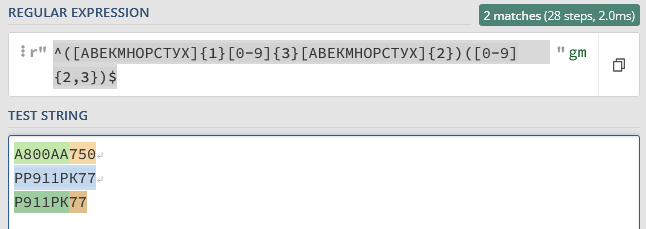

## Задание 2

Напишите функцию, которая будет удалять все последовательные повторы слов из заданной строки при помощи регулярных выражений.

Пример работы программы:  

`some_string = 'Напишите функцию функцию, которая будет будет будет будет удалять все все все все последовательные повторы слов из из из из заданной строки строки при помощи регулярных выражений.'`

Результат:  
`Напишите функцию, которая будет удалять все последовательные повторы слов из заданной строки при помощи регулярных выражений.`

In [ ]:
def del_repeats(string):
# Описание шаблона:
#(\w+) -любое слово
# (\s+) -любое число пробельных символов,
# (\s+\1) -любое число пробельных символов, затем  следует предыдущее слово  (ссылка \1), 
# + - сколько угодно раз повторяемое
# Очень изящно... Но идею итерции сам бы не додумал... тем более что ссылки 
# не получилось заставить работать в 1ой задаче 
# Авторство: # https://ru.stackoverflow.com/questions/1045815/
    reg_exp = r'(\w+)(\s+\1)+'
    return re.sub(reg_exp, r'\1', string)

some_string = 'Напишите функцию функцию, которая будет будет будет будет удалять все все все все последовательные \
повторы слов из из из из заданной строки строки при помощи регулярных выражений.' 
print(del_repeats(some_string))

## Задание 3

Напишите функцию, которая будет возвращать акроним по переданной в нее строке со словами.

Примеры работы программы:  

1. `some_words = 'Информационные технологии'`

Результат: 
`ИТ`

2. `some_words = 'Near Field Communication'`

Результат: 
`NFC`

In [280]:
import re
def acronym (full_str=''):
    reg_exp = r'\b[A-Za-zА-Яа-яЁё]|\s[A-Za-zА-Яа-яЁё]'
    return re.sub(r'\s+', '',''.join(re.findall(reg_exp,full_str))).upper()

some_words = 'Микоян авиацию снабдил алкоголем, народ доволен работой авиаконструктора'
print('Результат:', acronym(some_words))

Результат: МАСАНДРА


## Задание 4

Напишите функцию, которая будет принимать на вход список email-адресов и выводить их распределение по доменным зонам.

Пример работы программы:  

`emails = ['test@gmail.com', 'xyz@test.in', 'test@ya.ru', 'xyz@mail.ru', 'xyz@ya.ru', 'xyz@gmail.com']`

Результат: 
```
gmail.com: 2
test.in: 1 
ya.ru: 2 
mail.ru: 1
```

In [ ]:
%%time
# Вариант без цикла, но с кучей join() и split()

import re
from collections import Counter

def domains_counter(e_mail_list=[]):
    # помещаем в строку домены из списка в виде @xyz.xyz 
    result = re.findall(r'@\w+.\w+', " ".join(e_mail_list))
    # формируем словарь частот предварительно убрав символ @
    for key, item in Counter(re.sub(r'@', '', " ".join(result)).split()).items():
        print(f'{key}:{item}')
    return

emails = ['test@gmail.com', 'xyz@test.in', 'test@ya.ru', 'xyz@mail.ru', 'xyz@ya.ru', 'xyz@gmail.com']

domains_counter(emails)


In [ ]:
%%time
# Вариант c циклом
import re
from collections import Counter

def domains_counter(e_mail_list=[]):
    result=[]
    for email in e_mail_list:
        
    # помещаем в список домены  в виде xyz.xyz использую мощь писанины в одну строку, которая через 1 час 
    # будет непонятной без комментария:
    # 1. методом findall находим домены с символом @
    # 2. методом sub убираем символ @
        result.append(re.sub(r'@', '', ''.join(re.findall(r'@\w+.\w+',email))))
       
    # формируем словарь частот используя объект Counter: 
    for key, item in Counter(result).items():
        print(f'{key}:{item}')
    return

emails = ['test@gmail.com', 'xyz@test.in', 'test@ya.ru', 'xyz@mail.ru', 'xyz@ya.ru', 'xyz@gmail.com']

domains_counter(emails)

## Задание 5 (необязательное)

Напишите функцию, которая будет подсчитывать сколько слов начинается на гласные, а сколько на согласные буквы в тексте (текст может быть написан как с использованием букв кириллицы, так и латиницы).

Пример работы программы:  

`some_text = 'Эталонной реализацией Python является интерпретатор CPython, поддерживающий большинство активно используемых платформ. Он распространяется под свободной лицензией Python Software Foundation License, позволяющей использовать его без ограничений в любых приложениях, включая проприетарные.'`

Результат: 
```
Слов на гласные буквы: 9
Слов на согласные буквы: 21 
```

In [ ]:
def letters_count(full_str=''):
# Шаблон: слово начинается с гласной в русском и английском языках:
    reg_exp_gl=r'\b[АаОоУуЫыЭэЕеЁёИиЮюЯяAaEeIiOoUuYy]' 
         
    # Найти все слова
    # Шаблон поиска- границы слова
    words_list=re.findall(r'\b\w+\b', full_str) 
    
    vowel_letter =0 # гласная буква
    consonant_letter =0 # согласная буква
    
    for item in words_list:
        if re.search(reg_exp_gl, item):
            vowel_letter +=1
        else:
            consonant_letter +=1
     
    print ('Слов на гласные буквы:', vowel_letter)
    print ('Слов на согласные буквы:', consonant_letter)
    return

some_text = 'Эталонной реализацией Python является интерпретатор CPython,\
поддерживающий большинство активно используемых платформ.\
Он распространяется под свободной лицензией Python Software Foundation License,\
позволяющей использовать его без ограничений в любых приложениях, включая проприетарные.'

letters_count(some_text)




## Задание 6 (необязательное)
Напишите функцию, которая будет проверять номер сотового телефона на валидность (только для российского формата), если он валиден, то переводить его в формат:   
+7-xxx-xxx-xx-xx  
Постарайтесь предусмотреть как можно больше адекватных форматов изначального ввода номера.
Примеры работы программы:  

1. `phone = '+7 955 555-55-55'`

Результат: 
`+7-955-555-55-55`

2. `phone = '8(955)555-55-55'`

Результат: 
`+7-955-555-55-55`

3. `phone = '+7 955 555 55 55'`

Результат: 
`+7-955-555-55-55`

4. `phone = '7(955) 555-55-55'`

Результат: 
`+7-955-555-55-55`

5. `phone = '423-555-55-5555'`

Результат: 
`Номер не валиден`

6. `phone = '123-456-789'`

Результат: 
`Номер не валиден`

In [281]:
import re
def test_phone_number(phone_str=''):
    #Описание шаблона
    # 1 группа:
    # -----------
    # Префикс:
    #------------
    # ([\+]?([7]{1})|8) если есть + или нет +, всегда есть 7, ,без плюса только 8
    #----------------
    # 2,4,6,8 группа:
    #----------------
    # Разделитель:
    #-------------
    # [\ -]? может быть тире или пробел, а может не быть ничего
    #--------------------------------
    # 3 группа: 
    #---------------------------------
    # Номер сети мобильного оператора:
    #---------------------------------
    # ?\(?(\d{3})\)? -скобки могут быть или не быть, внутри три цифры 
    #---------------------------------
    #  5 группа: Номер условной АТС мобильного оператора:
    #---------------------------------
    # (\d{3}) -три цифры  
    #----------------------------------
    # 7,9 группа: номер абонента
    # --------------------------------
    # (\d{2}) -две цифры
    #---------------------------------
    str_phone='Номер не валиден' 
    reg_exp = r'^([\+]?([7]{1})|8)[\ -]?\(?(\d{3})\)?[\ -]?(\d{3})[\ -]?(\d{2})[\ -]?(\d{2})$'
    phone = re.search(reg_exp, phone_str)
    if phone != None:
        str_phone=f'+7-{phone.group(3)}-{phone.group(4)}-{phone.group(5)}-{phone.group(6)}'
    return str_phone 

# Тестовый набор 
test_phones=[
'+7 955 555-55-55',
'8(955)555-55-55',
'8(100555-55-55',
'8100)555-55-55', 
'8(9555)555-55-55',     
'+7-955-555-55-55',
'+7 955 555 55 55',
'7(955) 555-55-55',
'+7(955)555-5555',
'89555555555',   
'423-555-55-5555',
'123-456-789'
            ]

for phone_str in test_phones:
        print('Проверяемый номер:', phone_str, '\nОтвет проверки:', test_phone_number(phone_str))
    

Проверяемый номер: +7 955 555-55-55 
Ответ проверки: +7-955-555-55-55
Проверяемый номер: 8(955)555-55-55 
Ответ проверки: +7-955-555-55-55
Проверяемый номер: 8(100555-55-55 
Ответ проверки: +7-100-555-55-55
Проверяемый номер: 8100)555-55-55 
Ответ проверки: +7-100-555-55-55
Проверяемый номер: 8(9555)555-55-55 
Ответ проверки: Номер не валиден
Проверяемый номер: +7-955-555-55-55 
Ответ проверки: +7-955-555-55-55
Проверяемый номер: +7 955 555 55 55 
Ответ проверки: +7-955-555-55-55
Проверяемый номер: 7(955) 555-55-55 
Ответ проверки: +7-955-555-55-55
Проверяемый номер: +7(955)555-5555 
Ответ проверки: +7-955-555-55-55
Проверяемый номер: 89555555555 
Ответ проверки: +7-955-555-55-55
Проверяемый номер: 423-555-55-5555 
Ответ проверки: Номер не валиден
Проверяемый номер: 123-456-789 
Ответ проверки: Номер не валиден


#### ПРИМЕЧАНИЕ
Домашнее задание сдается ссылкой [Google Colab](https://colab.research.google.com/).
Не сможем проверить или помочь, если вы пришлете:
- файлы;
- архивы;
- скриншоты кода.

Все обсуждения и консультации по выполнению домашнего задания ведутся только на соответствующем канале в slack.

##### Как правильно задавать вопросы аспирантам, преподавателям и коллегам
Прежде чем задать вопрос, попробуйте найти ответ в интернете. Навык самостоятельного поиска информации — один из важнейших. Каждый практикующий специалист любого уровня делает это ежедневно.

Сформулируйте вопрос по алгоритму:  
1) Что я делаю?  
2) Какого результата я ожидаю?  
3) Как фактический результат отличается от ожидаемого?  
4) Что я уже попробовал сделать, чтобы исправить проблему?  

По возможности прикрепите к вопросу скриншоты либо ссылки на код. Не выкладывайте все решение, оставляйте только проблемный и воспроизводимый участок кода.